**Prerequisits**

In [17]:
%pip install pandas
%pip install jinja2
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install gensim
%pip install graphviz
%pip install dtreeviz


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/91.8 kB ? eta -:--:--
   ----------------------------------- ---- 81.9/91.8 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 91.8/91.8 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/325.1 kB ? eta -:--:--
   ----------------- ---------------------- 143.4/325.1 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------  317.4/325.1 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 325.1/325.1 kB 3.3 MB/s eta 0:00:00


**Imports**

In [7]:
import pandas as pd
import numpy as np
import joblib
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import GaussianNB
from gensim.models import Word2Vec

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Loading and cleaning datasets**

In [8]:
file_path = "dataset\\SQL_Dataset.csv"
df = pd.read_csv(file_path)
df= df.dropna()
df=df.drop_duplicates()
display(df.head().style.map(lambda x: 'font-weight: bold;text-align: left;color: red;'))
display(HTML("<hr>"))
df.info()
display(HTML("<hr>"))
df.describe().style.map(lambda x: 'text-align: center;')

<class 'pandas.core.frame.DataFrame'>
Index: 30907 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30907 non-null  object
 1   Label   30907 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 724.4+ KB


**Splitting dataset**

In [9]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english',max_features=1000, ngram_range=(1, 2), sublinear_tf=True,min_df=2, max_df=0.95)  
X = df['Query']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(HTML("<h2>X_train (Training Data):</h2>"))
display(X_train.head())
display(HTML("<hr>"))

display(HTML("<h2>X_test (Testing Data):</h2>"))
display(X_test.head())
display(HTML("<hr>"))

display(HTML("<h2>y_train (Training Labels):</h2>"))
display(y_train.head())
display(HTML("<hr>"))

display(HTML("<h2>y_test (Testing Labels):</h2>"))
display(y_test.head())
display(HTML("<hr>"))



11322    -8609%"   )    )     )   union all select 6021...
6926                               -6546"  )   order by 1#
29671    SELECT AVG ( thick )  FROM hall  SELECT SUM ( ...
9403     1"   )    )     )   and   (  7396  =  6351  ) ...
15044                                              sojuela
Name: Query, dtype: object

2154     1"   )    )    and   (  select * from   (  sel...
19684    SELECT * FROM wp_posts WHERE ID  =  28694 LIMIT 1
3877     1'  )   as uqkz where 8482  =  8482 and 8407  ...
13708                                         madan deluca
23058       SELECT * FROM  ( SELECT birds FROM attached ) 
Name: Query, dtype: object

11322    1
6926     1
29671    0
9403     1
15044    0
Name: Label, dtype: int64

2154     1
19684    0
3877     1
13708    0
23058    0
Name: Label, dtype: int64

**Evaluation function**

In [40]:
fpr = dict()
tpr = dict()
roc_auc = dict()
def eval(model,matrix,x_test):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    y_prob = model.predict_proba(x_test)

    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_test == model.classes_[i]).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))

    for i in range(len(model.classes_)):
        plt.plot(fpr[i], tpr[i], label=f'{model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

## Multinomial Naïve Bayes

In [5]:
vectorizer = CountVectorizer(ngram_range=(1, 4))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
mnb_model = MultinomialNB()
mnb_model.fit(X_train_vectorized, y_train)
joblib.dump(mnb_model, 'models/mnb_model.joblib')

# Make predictions on the test set
y_pred = mnb_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep)
display(HTML("<hr>Model saved"))


NameError: name 'CountVectorizer' is not defined

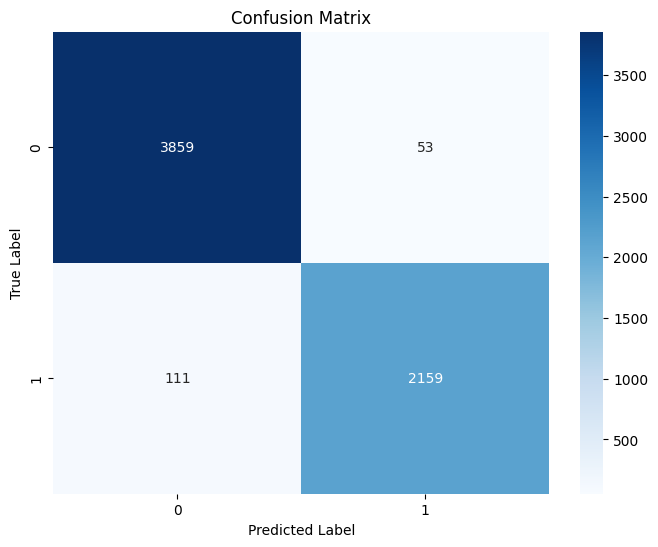

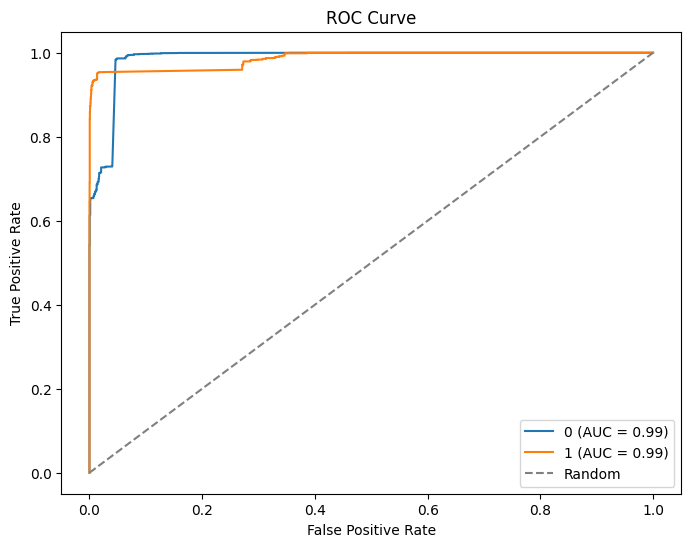

In [ ]:
eval(mnb_model,conf_matrix,X_test_vectorized)

## Bernoulli’s Naïve Bayes

In [ ]:
vec=1000
tokenized_text = [text.split() for text in X]
cbow_model = Word2Vec(sentences=tokenized_text, vector_size=vec, window=5, min_count=1, workers=4)

def get_doc_embedding(doc, model, vector_size):
    words = doc.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if not embeddings:
        return [0] * vector_size 
    return sum(embeddings) / len(embeddings)

X_train_cbow = [get_doc_embedding(doc, cbow_model, vec) for doc in X_train]
X_test_cbow = [get_doc_embedding(doc, cbow_model, vec) for doc in X_test]
X_train_cbow_array = pd.DataFrame(X_train_cbow).to_numpy()
X_test_cbow_array = pd.DataFrame(X_test_cbow).to_numpy()

bnb_model_cbow = BernoulliNB()
bnb_model_cbow.fit(X_train_cbow_array, y_train)

y_pred_cbow = bnb_model_cbow.predict(X_test_cbow_array)

accuracy_cbow = accuracy_score(y_test, y_pred_cbow)
conf_matrix_cbow = confusion_matrix(y_test, y_pred_cbow)
classification_rep_cbow = classification_report(y_test, y_pred_cbow)
joblib.dump(bnb_model_cbow, 'models/bnb_model_cbow.joblib')

print(f"Accuracy: {accuracy_cbow}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix_cbow)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep_cbow)
display(HTML("<hr>Model saved"))


Accuracy: 0.9762212876091879


Confusion Matrix:
[[3808  104]
 [  43 2227]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3912
           1       0.96      0.98      0.97      2270

    accuracy                           0.98      6182
   macro avg       0.97      0.98      0.97      6182
weighted avg       0.98      0.98      0.98      6182



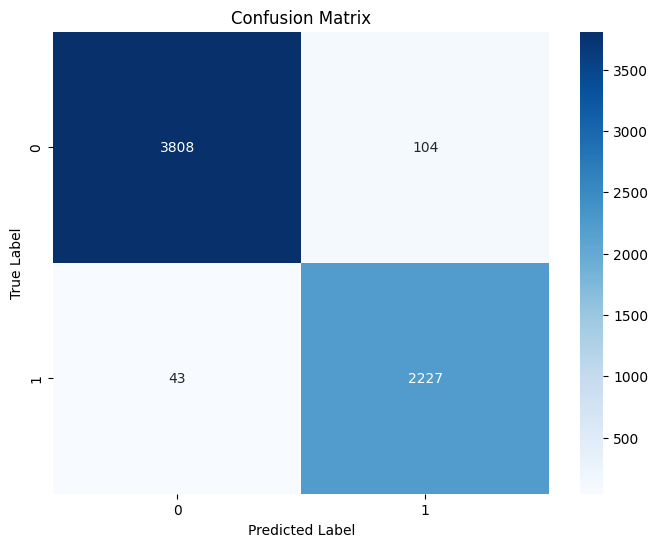

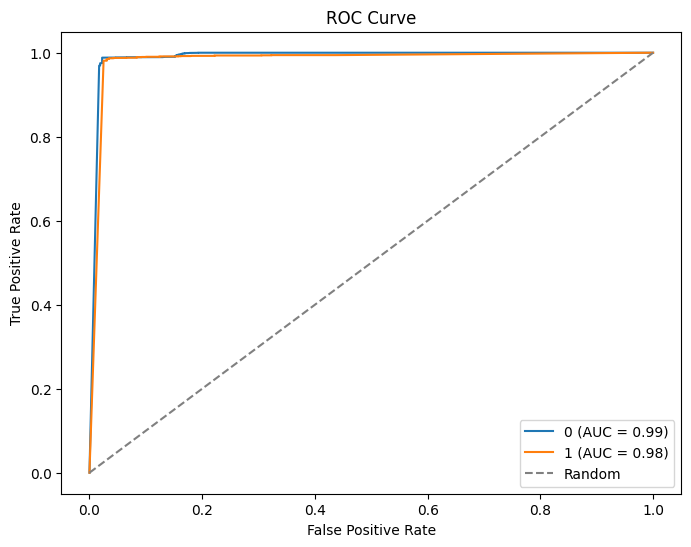

In [ ]:
eval(bnb_model_cbow,conf_matrix_cbow,X_test_cbow_array)

##  Gaussian Naïve Bayes

In [ ]:
tokenized_text = [text.split() for text in X]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=1000, window=5, min_count=1, workers=4)

def get_doc_embedding(doc, model, vector_size):
    words = doc.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if not embeddings:
        return [0] * vector_size 
    return sum(embeddings) / len(embeddings)

X_train_word2vec = [get_doc_embedding(doc, word2vec_model, 1000) for doc in X_train]
X_test_word2vec = [get_doc_embedding(doc, word2vec_model, 1000) for doc in X_test]

X_train_word2vec_array = pd.DataFrame(X_train_word2vec).to_numpy()
X_test_word2vec_array = pd.DataFrame(X_test_word2vec).to_numpy()

gnb_model_word2vec = GaussianNB()
gnb_model_word2vec.fit(X_train_word2vec_array, y_train)
y_pred_word2vec = gnb_model_word2vec.predict(X_test_word2vec_array)
joblib.dump(gnb_model_word2vec, 'models/gnb_model_word2vec.joblib')


accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
conf_matrix_word2vec = confusion_matrix(y_test, y_pred_word2vec)
classification_rep_word2vec = classification_report(y_test, y_pred_word2vec)

# Display the results
print(f"Accuracy with Gaussian NB and Word2Vec: {accuracy_word2vec}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix_word2vec)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep_word2vec)
display(HTML("<hr>Model saved"))


Accuracy with Gaussian NB and Word2Vec: 0.9886768036234228


Confusion Matrix:
[[3883   29]
 [  41 2229]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3912
           1       0.99      0.98      0.98      2270

    accuracy                           0.99      6182
   macro avg       0.99      0.99      0.99      6182
weighted avg       0.99      0.99      0.99      6182



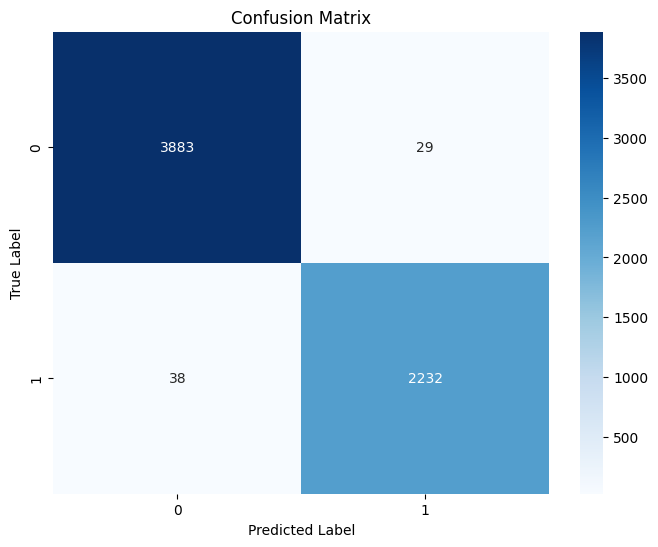

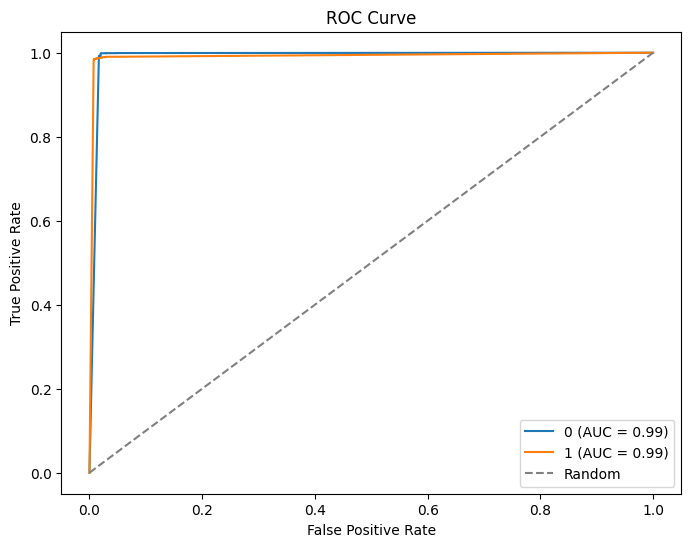

In [ ]:
eval(gnb_model_word2vec,conf_matrix_word2vec,X_test_word2vec_array)

## SVM RBF 

In [ ]:
#TAKES 10 MINUTES TO RUN! DO NOT EXECUTE!

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True) 
svm_rbf_model.fit(X_train_tfidf, y_train)

y_pred_svm_rbf = svm_rbf_model.predict(X_test_tfidf)
joblib.dump(svm_rbf_model, 'models/svm_rbf_model.joblib')

accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
classification_rep_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

print(f"Accuracy with SVM RBF and TF-IDF: {accuracy_svm_rbf}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix_svm_rbf)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep_svm_rbf)
display(HTML("<hr>Model saved"))

Accuracy with SVM RBF and TF-IDF: 0.9909414428987383


Confusion Matrix:
[[3891   21]
 [  35 2235]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3912
           1       0.99      0.98      0.99      2270

    accuracy                           0.99      6182
   macro avg       0.99      0.99      0.99      6182
weighted avg       0.99      0.99      0.99      6182



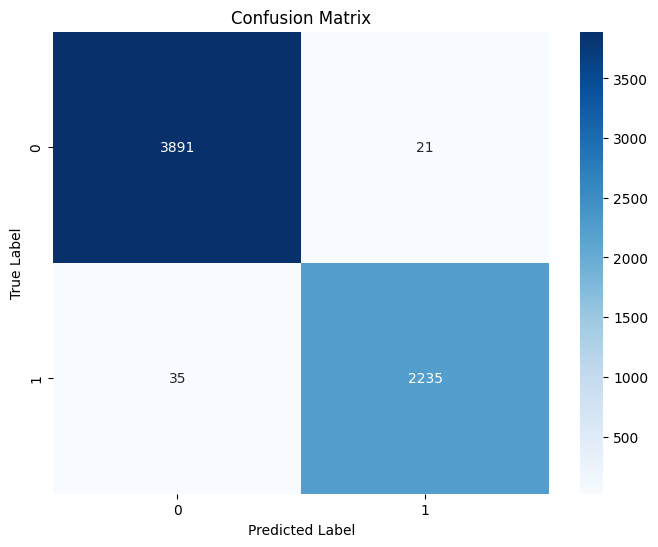

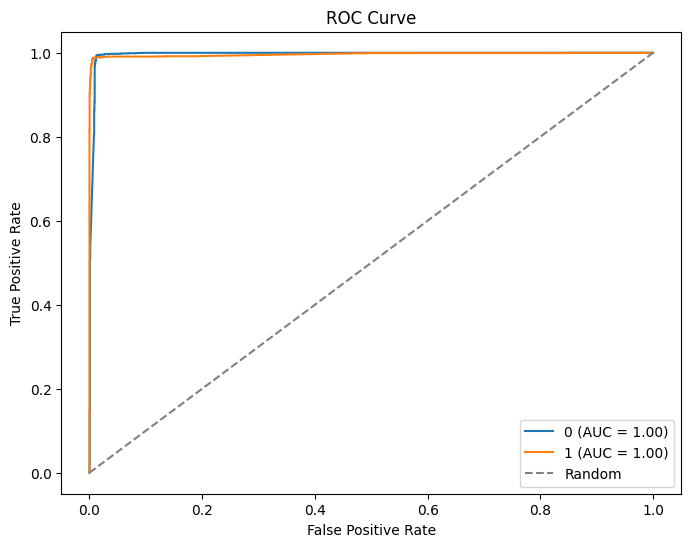

In [ ]:
eval(svm_rbf_model,conf_matrix_svm_rbf,X_test_tfidf)

## Logistic Regression

In [ ]:
X_tfidf = tfidf_vectorizer.fit_transform(X.astype(str))

# Split the dataset into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=100)
logreg_model.fit(X_train_1, y_train_1)
joblib.dump(logreg_model, 'models/log_reg_model.joblib')

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_1)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test_1, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test_1, y_pred_logreg)
classification_rep_logreg = classification_report(y_test_1, y_pred_logreg)

# Display the results
print(f"Accuracy with Logistic Regression: {accuracy_logreg}")
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("Classification Report:")
print(classification_rep_logreg)

Accuracy with Logistic Regression: 0.9543836945972177
Confusion Matrix:
[[3883   29]
 [ 253 2017]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3912
           1       0.99      0.89      0.93      2270

    accuracy                           0.95      6182
   macro avg       0.96      0.94      0.95      6182
weighted avg       0.96      0.95      0.95      6182



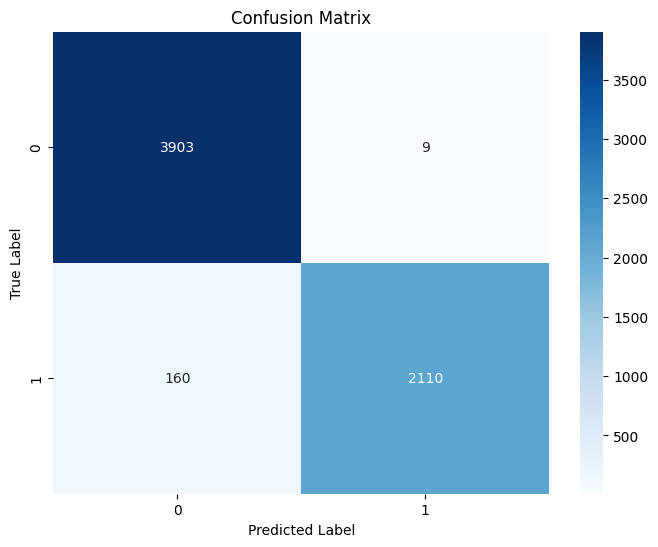

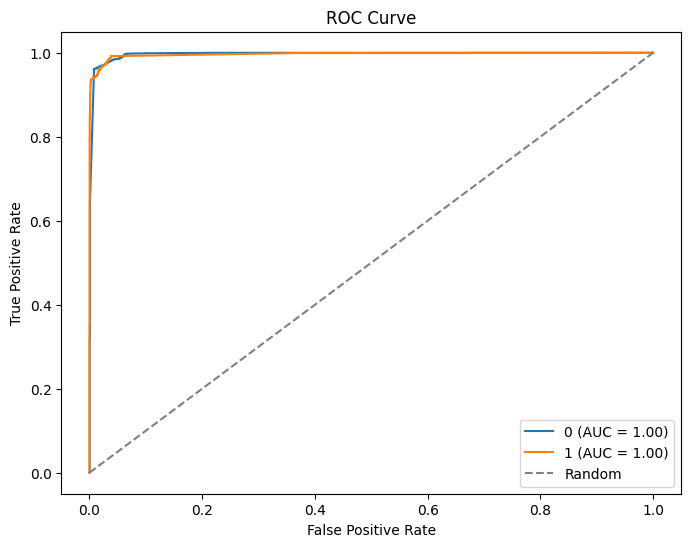

In [ ]:
eval(logreg_model,conf_matrix_logreg,X_test_1)


In [42]:
X_tfidf_dt = tfidf_vectorizer.fit_transform(X_train.astype(str))
X_tfidf_dt_test = tfidf_vectorizer.transform(X_test.astype(str))

dt_model = DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_model.fit(X_tfidf_dt, y_train)
joblib.dump(dt_model, 'models/dt_model.joblib')

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_tfidf_dt_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Display the results
print(f"Accuracy with Decision Tree: {accuracy_dt}")
display(HTML("<hr>"))

print("Confusion Matrix:")
print(conf_matrix_dt)
display(HTML("<hr>"))

print("Classification Report:")
print(classification_rep_dt)
display(HTML("<hr>Model saved"))

Accuracy with Decision Tree: 0.9443545778065351
Confusion Matrix:
[[3903    9]
 [ 335 1935]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3912
           1       1.00      0.85      0.92      2270

    accuracy                           0.94      6182
   macro avg       0.96      0.93      0.94      6182
weighted avg       0.95      0.94      0.94      6182



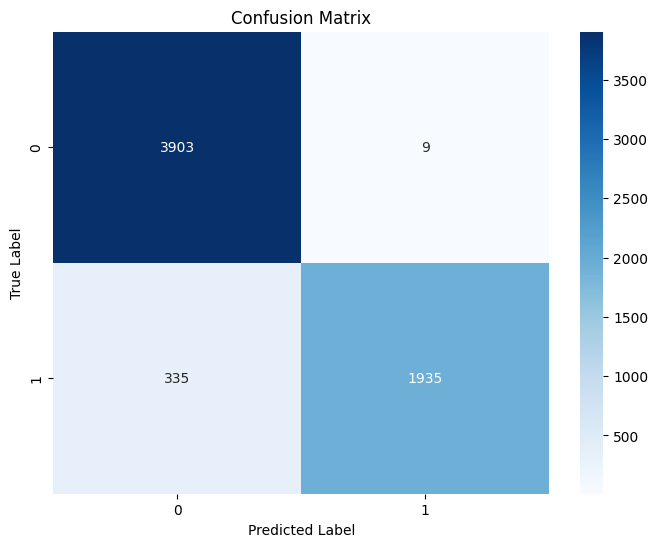

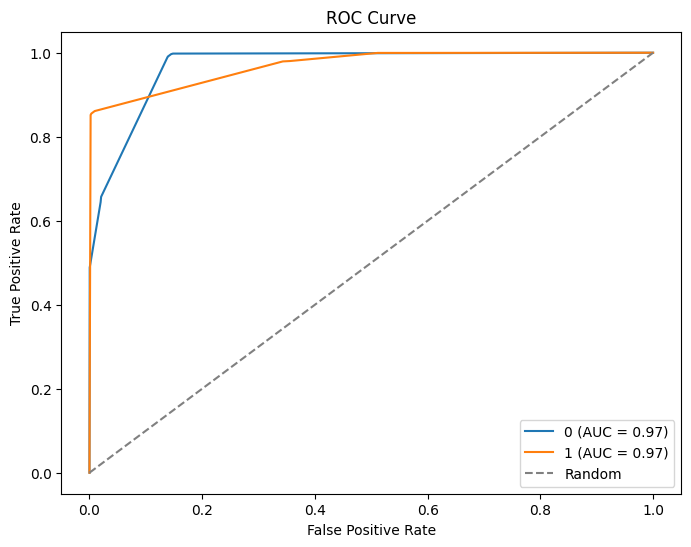

In [43]:
eval(dt_model,conf_matrix_dt,X_tfidf_dt_test)

plt.figure(figsize=(120,80))
tree.plot_tree(dt_model,rounded=True, fontsize=50)
plt.show()

